# I. Business Background

## 1. Objectives

The data represents a marketing campaign conducted by a Portuguese banking institution. The campaigns were primarily based on phone calls with clients. In many cases, multiple contacts with the same client were required to determine whether the client would subscribe to a bank term deposit (with the outcome being either 'yes' or 'no'). The overall objective is to predict whether a client will subscribe to a term deposit (variable y) and to identify the attributes that have the greatest impact on clients likely to subscribe.

## 2. Key business questions to answer

1. What factors influence whether a customer subscribes (y)?
2. Predicting the characteristics that determine if a customer will subscribe or not a term deposit.
3. How to adjust customer communication to increase the likelihood of customer subscribtion?

## 3. Key business decisions to make

1. Enhance call engagement strategies

- Train sales representatives to personalize conversations based on customer data to improve conversion rates?

- Implement data-driven scheduling to contact potential customers at the most effective times?

2. Identify and prioritize high-potential customer

- Focus marketing efforts on individuals with past positive responses, high engagement, or strong financial indicators?

- Develop personalized offers and messaging strategies tailored to high-potential leads?

3. Streamline and improve marketing efficiency

Optimize resource allocation by targeting only the most promising customer segments

# II. Data Understanding

## 1. Data Collection

In [28]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [30]:
df = X.join(y['y']) #dataframe[column]
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


## 2. Import necessary packages 

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

## 3. Data Inspection

In [32]:
#overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


*Based on this dataset, our goal is to identify which attributes that have the highest impact on clients who are likely to subscribe to a term deposit.

### a. Review numerical variables

In [33]:
#Short overview of the data
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### b. Review values of categorical variables

In [34]:
#job
print(df["job"].unique())

#marital
print(df["marital"].unique())

#education
print(df["education"].unique())

#default
print(df["default"].unique())

#housing
print(df["housing"].unique())

#loan
print(df["loan"].unique())

#contact
print(df["contact"].unique())

#month
print(df["month"].unique())

#poutcome
print(df["poutcome"].unique())

#y
print(df["y"].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' nan 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
[nan 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[nan 'failure' 'other' 'success']
['no' 'yes']


Consider to convert binary variable such as default, housing, loan and y into numerical data with value 0, 1 for computing correlation

# III. Data Pre-processing

## 1. Handle Missing Data: 

Identify and decide how to treat missing value

In [35]:
print(df.isnull().sum())  # Check missing values

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64


Solutions:
- Removing unnecessary columns with too many missing values such as "contact".
- Drop rows with too many missing values but under 5% of total count_values
- Fill missing values using .fillna() for categorical or .mean() for numerical.

### a. Removing "contact" column

In [36]:
df.drop(columns=["contact"], inplace=True) 

In [37]:
df.shape

(45211, 16)

### b. Handling missing values in other columns such as "job" "education" and "poutcome"

In [38]:
job_missing = len(df) * 0.05
print(job_missing)

2260.55


In [39]:
# drop if 5% or less of total values)
cols_to_drop = df.columns[df.isna().sum() <= job_missing]
print(cols_to_drop)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day_of_week', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')


In [40]:
df.dropna(subset=cols_to_drop, inplace=True) 
print(df.isnull().sum())  # Check missing values

age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       35286
y                  0
dtype: int64


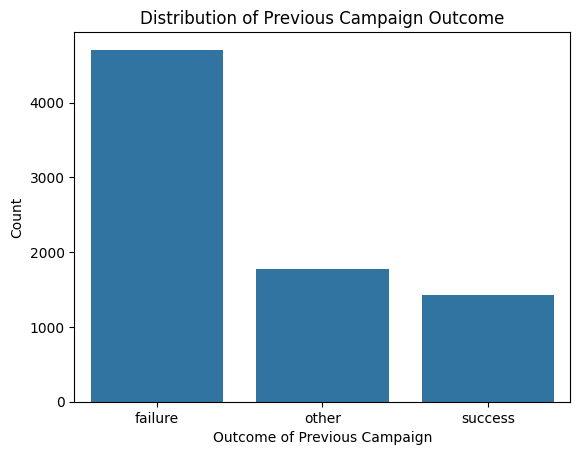

In [41]:
#display distribution of poutcome
sns.countplot(data = df, x = 'poutcome')
plt.xlabel("Outcome of Previous Campaign")
plt.ylabel("Count")
plt.title("Distribution of Previous Campaign Outcome")
plt.show()

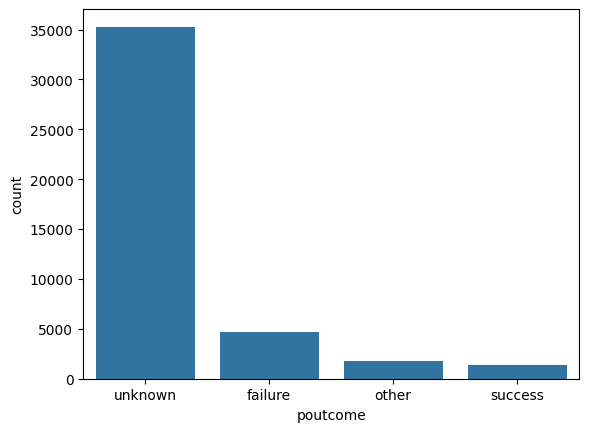

In [42]:
# imputing missing values in "poutcome" with "unknown" values
df["poutcome"] = df["poutcome"].fillna("unknown")

#display distribution of poutcome
sns.countplot(x="poutcome", data=df)
plt.show()

In [43]:
#final checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          43193 non-null  int64 
 1   job          43193 non-null  object
 2   marital      43193 non-null  object
 3   education    43193 non-null  object
 4   default      43193 non-null  object
 5   balance      43193 non-null  int64 
 6   housing      43193 non-null  object
 7   loan         43193 non-null  object
 8   day_of_week  43193 non-null  int64 
 9   month        43193 non-null  object
 10  duration     43193 non-null  int64 
 11  campaign     43193 non-null  int64 
 12  pdays        43193 non-null  int64 
 13  previous     43193 non-null  int64 
 14  poutcome     43193 non-null  object
 15  y            43193 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.6+ MB


## 2. Numerical Variables

### a. Validating Numerical Variables

In [44]:
#summarize numerical variables
numeric_df = df.select_dtypes('number')
numeric_df.head()

,age,balance,day_of_week,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
5,35,231,5,139,1,-1,0
6,28,447,5,217,1,-1,0


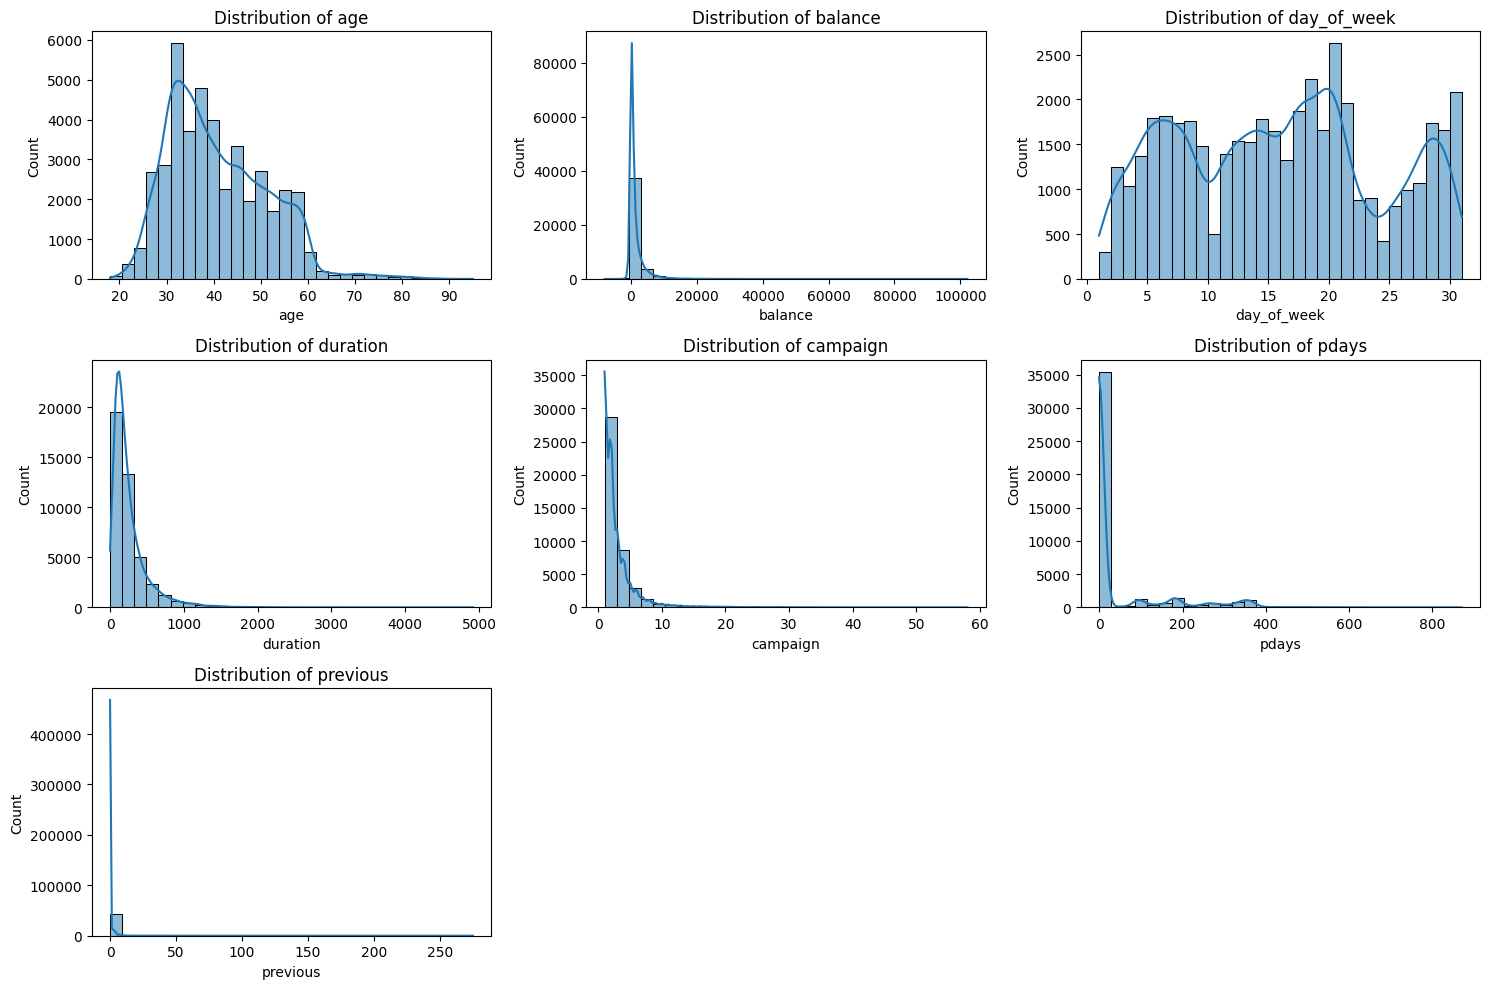

In [45]:
# Set the plot size
plt.figure(figsize=(15, 10))

# Loop through each numerical attribute and create histograms
for i, col in enumerate(numeric_df.columns):
    plt.subplot(3, 3, i+1)  # Adjust subplot layout based on the number of numerical attributes
    sns.histplot(df[col], bins=30, kde=True)  # Histogram with KDE (density curve)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Most of these variables is highly right-skewed. We need to use log transformation before defining any variables relationships

In [46]:
# Generate summary statistics
print(df.describe())

                age        balance   day_of_week      duration      campaign  \
count  43193.000000   43193.000000  43193.000000  43193.000000  43193.000000   
mean      40.764082    1354.027342     15.809414    258.323409      2.758178   
std       10.512640    3042.103625      8.305970    258.162006      3.063987   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      71.000000      8.000000    103.000000      1.000000   
50%       39.000000     442.000000     16.000000    180.000000      2.000000   
75%       48.000000    1412.000000     21.000000    318.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     58.000000   

              pdays      previous  
count  43193.000000  43193.000000  
mean      40.404070      0.584863  
std      100.420624      2.332672  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

1. age : there might be some outliers which could represent elderly clients or potential data errors
2. balance: Highly skewed to the right which suggests extreme outliers. The 75th percentile is only 1,412 meaning balances above this point are quite rare
3. duration: Highly right-skewed. Calls longer than 1000 seconds (+16 minutes) may be rare
4. campaign (number of contacts performed in current campaign): According to the histogram, anything above 10 contacts may be unusual and should be analyzed separately
5. pdays (days since last contact in pervious campaign): the majority of values are "-1" which likely means "never contacted before". We may treat "-1" as a separate category rather than keeping it numerical
6. previous (number of contacts in previous campaigns): the max is 275 seems extremely high and could be due to data entry errors. Consider binning this variable: 0, 1-3, 4-10, 10+

### b. Categorize age into groups: young, middle-aged, senior

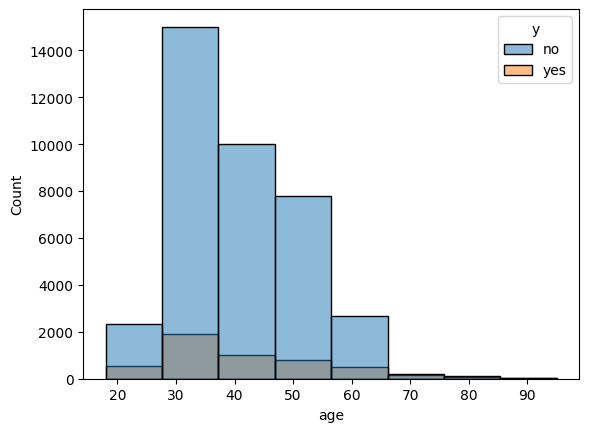

In [47]:
sns.histplot(data=df, x="age", binwidth=10, hue="y")
plt.show()

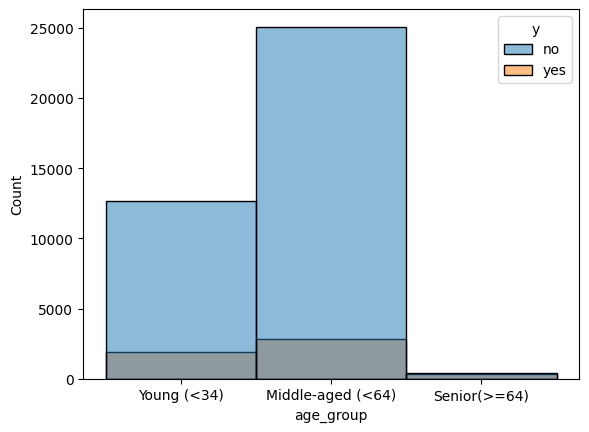

In [48]:
df["age_group"] = pd.cut(df["age"], bins=[0, 34, 64, 100], labels=["Young (<34)", "Middle-aged (<64)", "Senior(>=64)"])
sns.histplot(data=df, x="age_group", binwidth=10, hue="y")
plt.show()

### b. Handling Outliers of balance

In [49]:
df["balance"].describe()

count     43193.000000
mean       1354.027342
std        3042.103625
min       -8019.000000
25%          71.000000
50%         442.000000
75%        1412.000000
max      102127.000000
Name: balance, dtype: float64

In [50]:
#print measures of spread of balance variable
print(np.mean(df["balance"]))
print(np.median(df["balance"]))
print(np.var(df["balance"]))
print(np.quantile(df["balance"],[0, 0.25, 0.5, 0.75, 1]))

1354.0273423934434
442.0
9254180.2095874
[-8.01900e+03  7.10000e+01  4.42000e+02  1.41200e+03  1.02127e+05]


Re-categorize into groups

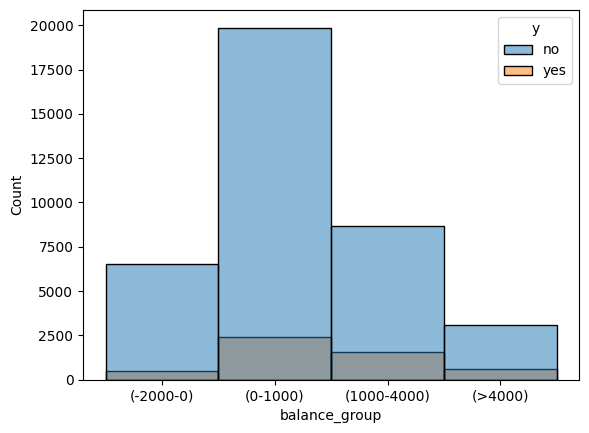

In [51]:
#re-categorize balance into groups

df["balance_group"] = pd.cut(df["balance"], bins=[-9000, 0, 1000, 4000, df["balance"].max()], labels=["(-2000-0)", "(0-1000)", "(1000-4000)", "(>4000)"])

# distribution of balance in groups
sns.histplot( x="balance_group", data=df, binwidth=1000, hue="y")
plt.show()

balance: It seems there is no clear pattern between balance and target variable y

### d. Handling Outliers  of duration

In [52]:
df["duration"].describe()

count    43193.000000
mean       258.323409
std        258.162006
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

In [53]:
#print measures of spread of duration variable
print(np.mean(df["duration"]))
print(np.median(df["duration"]))
print(np.var(df["duration"]))
print(np.quantile(df["balance"],[0, 0.25, 0.5, 0.75, 1]))

258.32340888569905
180.0
66646.0783298515
[-8.01900e+03  7.10000e+01  4.42000e+02  1.41200e+03  1.02127e+05]


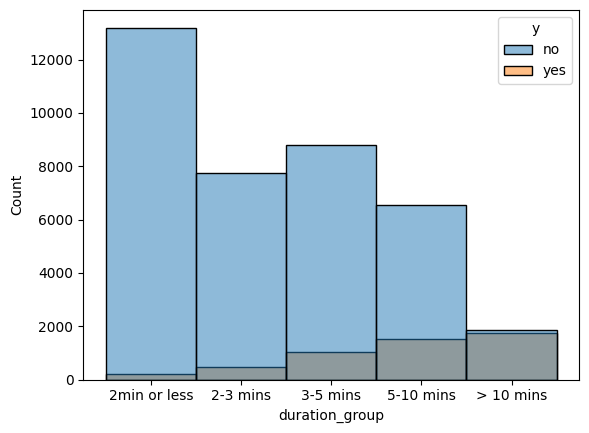

In [54]:
#re-categorize duration into groups

df["duration_group"] = pd.cut(df["duration"], bins=[df["duration"].min(),  120,  180,  300, 600,  df["duration"].max()], labels=["2min or less", "2-3 mins", "3-5 mins", "5-10 mins", "> 10 mins"])

# distribution of balance in groups
sns.histplot( x="duration_group", data=df, binwidth=1000, hue="y")
plt.show()

duration: clients who have longer contact duration during the campaign are more likely to subscribe a term deposit

### d. Convert pdays into categorical bins

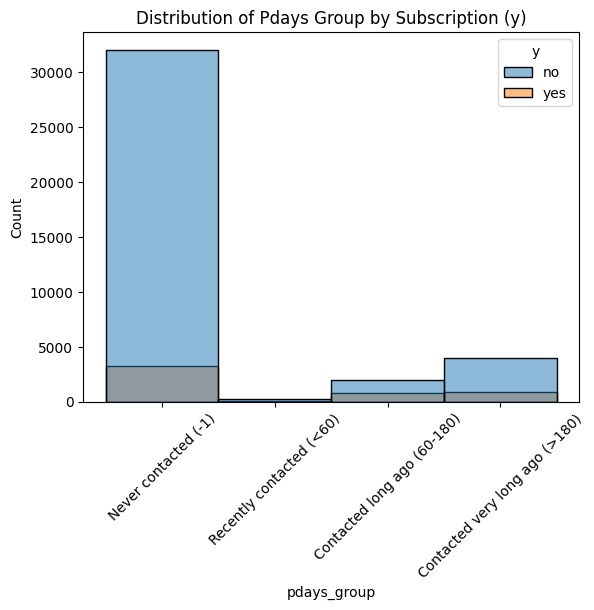

In [55]:
df["pdays_group"] = pd.cut(
    df["pdays"],
    bins=[-2, 0, 60, 180, df["pdays"].max()],  # Cover all values properly
    labels=["Never contacted (-1)", "Recently contacted (<60)", "Contacted long ago (60-180)", "Contacted very long ago (>180)"]
)
sns.histplot(data=df, x="pdays_group", binwidth=10, hue="y")
plt.xticks(rotation=45)
plt.title("Distribution of Pdays Group by Subscription (y)")
plt.show()

### e. Convert previous into categorical bins

In [56]:
df["previous"].describe()

count    43193.000000
mean         0.584863
std          2.332672
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

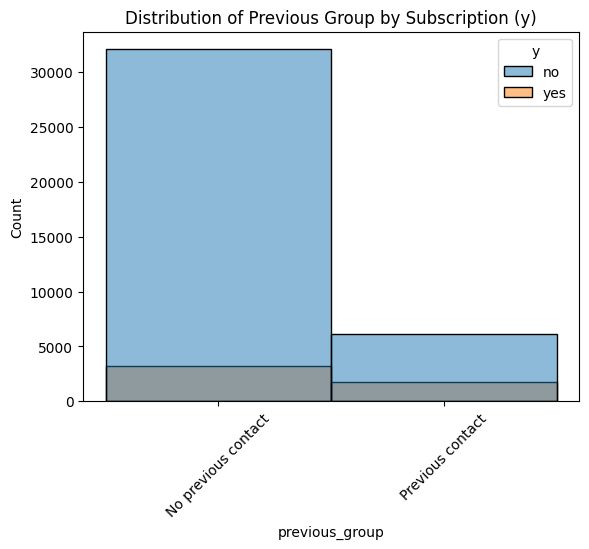

In [57]:
# Convert previous into categorical bins

df["previous_group"] = np.where(df["previous"] == 0, "No previous contact", "Previous contact")
sns.histplot(data=df, x="previous_group", binwidth=10, hue="y")
plt.xticks(rotation=45)
plt.title("Distribution of Previous Group by Subscription (y)")
plt.show()

## 3. Categorical Variables

### a.  Validating Categorical Variables

In [58]:
#summarize data types by columns
df.select_dtypes("object").head()

,job,marital,education,default,housing,loan,month,poutcome,y,previous_group
0,management,married,tertiary,no,yes,no,may,unknown,no,No previous contact
1,technician,single,secondary,no,yes,no,may,unknown,no,No previous contact
2,entrepreneur,married,secondary,no,yes,yes,may,unknown,no,No previous contact
5,management,married,tertiary,no,yes,no,may,unknown,no,No previous contact
6,management,single,tertiary,no,yes,yes,may,unknown,no,No previous contact


In [59]:
# Filter the DataFrame for object columns
categorical_df = df.select_dtypes('object')
# Loop through columns
for col in categorical_df.columns:
# Print the number of unique values
  print(f"Number of unique values in {col} column: ", categorical_df[col].nunique(), categorical_df[col].unique())

Number of unique values in job column:  11 ['management' 'technician' 'entrepreneur' 'retired' 'admin.' 'services'
 'blue-collar' 'self-employed' 'unemployed' 'housemaid' 'student']
Number of unique values in marital column:  3 ['married' 'single' 'divorced']
Number of unique values in education column:  3 ['tertiary' 'secondary' 'primary']
Number of unique values in default column:  2 ['no' 'yes']
Number of unique values in housing column:  2 ['yes' 'no']
Number of unique values in loan column:  2 ['no' 'yes']
Number of unique values in month column:  12 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Number of unique values in poutcome column:  4 ['unknown' 'failure' 'other' 'success']
Number of unique values in y column:  2 ['no' 'yes']
Number of unique values in previous_group column:  2 ['No previous contact' 'Previous contact']


### b. Categorize job into groups: high income (2), med income (1), little to none income (0)

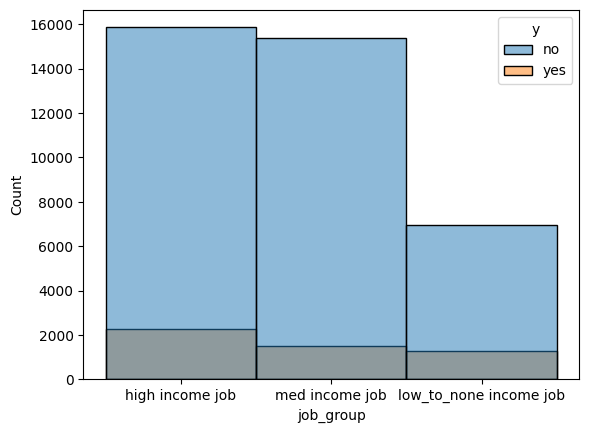

In [60]:
df["job_group"] = np.where(df['job'].isin(['management', 'self-employed', 'technician']), 'high income job', 
                        np.where(df['job'].isin(['admin.', 'blue-collar', 'entrepreneur', 'housemaid']), 'med income job', 'low_to_none income job'))

sns.histplot(data=df, x="job_group", hue="y")
plt.show()

### c. Convert month into numerical variable

In [61]:
#add a new column that convert month to number
df["month_num"] = df["month"].map({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})

df["month_num"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

Conclusion of the pre-processing and transformation steps:

- We handled all missing values in our dataset by removing missing values in the variables in which the number of missing values is under 5% including job, education, doing imputation on the missing values of the poutcome variable

- We are going to drop “contact”, “day” and “month” column here since they are not helping us in identifying useful underlying pattern in the model.

- We are going to take "age_group", "blance_group", “job_group”, “marital”, “education”, “default”, “housing”, “loan”, “poutcome”, "pdays_group" and "y" as categorical features and we are doing one hot encoding on them for the modeling stage stage

# IV. Exploratory Data Analysis

## 1. Relationship between numerical variables and the target variables

In [62]:
#encoding the target variable
df['y_num'] = df['y'].map({'yes': 1, 'no': 0})

In [63]:
#filter a new table with key numerical variables
key_numberic_variables = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y_num']
numberic_df = df[key_numberic_variables]
numberic_df.head()

,age,balance,duration,campaign,pdays,previous,y_num
0,58,2143,261,1,-1,0,0
1,44,29,151,1,-1,0,0
2,33,2,76,1,-1,0,0
5,35,231,139,1,-1,0,0
6,28,447,217,1,-1,0,0


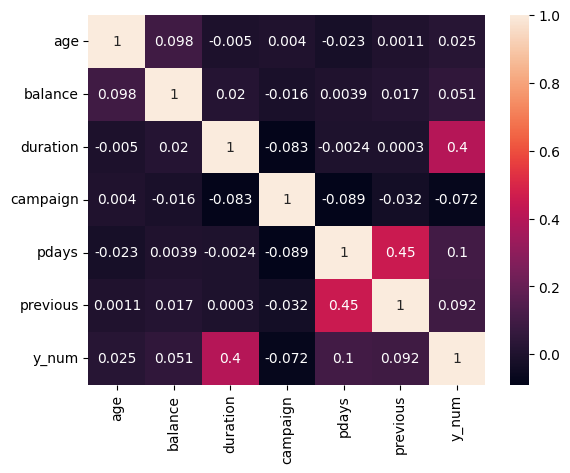

In [64]:
#check correlation by heatmap among key numerical variables
sns.heatmap(numberic_df.corr(), annot = True)

plt.show()

In [65]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
print(correlation_matrix)

                  age   balance  day_of_week  duration  campaign     pdays  \
age          1.000000  0.097602    -0.008451 -0.004953  0.004050 -0.023248   
balance      0.097602  1.000000     0.004118  0.020051 -0.016251  0.003928   
day_of_week -0.008451  0.004118     1.000000 -0.030074  0.164982 -0.094343   
duration    -0.004953  0.020051    -0.030074  1.000000 -0.083118 -0.002403   
campaign     0.004050 -0.016251     0.164982 -0.083118  1.000000 -0.088920   
pdays       -0.023248  0.003928    -0.094343 -0.002403 -0.088920  1.000000   
previous     0.001099  0.016564    -0.052053  0.000295 -0.032381  0.452953   

             previous  
age          0.001099  
balance      0.016564  
day_of_week -0.052053  
duration     0.000295  
campaign    -0.032381  
pdays        0.452953  
previous     1.000000  


According to the heatmap, we found the numeric features which are most correlated with y are:

<img src="image-20250303-222348.png" width="" align="left" />

In [66]:
#calculate mean values of key numerical variables by the target variable y
numberic_df.groupby('y_num').mean()

,age,balance,duration,campaign,pdays,previous
y_num,,,,,,
0,40.669679,1297.333176,221.115949,2.838704,36.709394,0.507230
1,41.481777,1785.043019,541.191994,2.145987,68.492731,1.175065


From these averages, we can observe that clients who subscribed to a term deposit (represented by the "1" (yes) category) tend to have certain characteristics compared to those who did not (represented by the "no" category):
1. duration: The mean duration for subscribers (y=yes) is significantly higher (541.19) than non-subscribers (221.12). Longer call durations strongly indicate a higher likelihood of subscription.
2. previous: Subscribers have a much higher mean number of previous contacts (1.18) compared to non-subscribers (0.51). Prior interactions increase the chances of a successful subscription.
3. pdays: Subscribers have a higher mean pdays (68.49) compared to non-subscribers (36.71). This suggests that customers who were contacted after a longer gap are more likely to subscribe.
4. balance: The average balance of subscribers (1785.04) is higher than non-subscribers (1297.33), indicating that customers with higher balances may be more likely to subscribe.


## 2. Relationship between the categorical variables and the target variables

In [67]:
#filter a new table with key categorical variables
key_categorical_variables = ['job_group', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome','age_group', 'balance_group','pdays_group', 'y']
categorical_df = df[key_categorical_variables]
categorical_df.head()

,job_group,marital,education,default,housing,loan,poutcome,age_group,balance_group,pdays_group,y
0,high income job,married,tertiary,no,yes,no,unknown,Middle-aged (<64),(1000-4000),Never contacted (-1),no
1,high income job,single,secondary,no,yes,no,unknown,Middle-aged (<64),(0-1000),Never contacted (-1),no
2,med income job,married,secondary,no,yes,yes,unknown,Young (<34),(0-1000),Never contacted (-1),no
5,high income job,married,tertiary,no,yes,no,unknown,Middle-aged (<64),(0-1000),Never contacted (-1),no
6,high income job,single,tertiary,no,yes,yes,unknown,Young (<34),(0-1000),Never contacted (-1),no


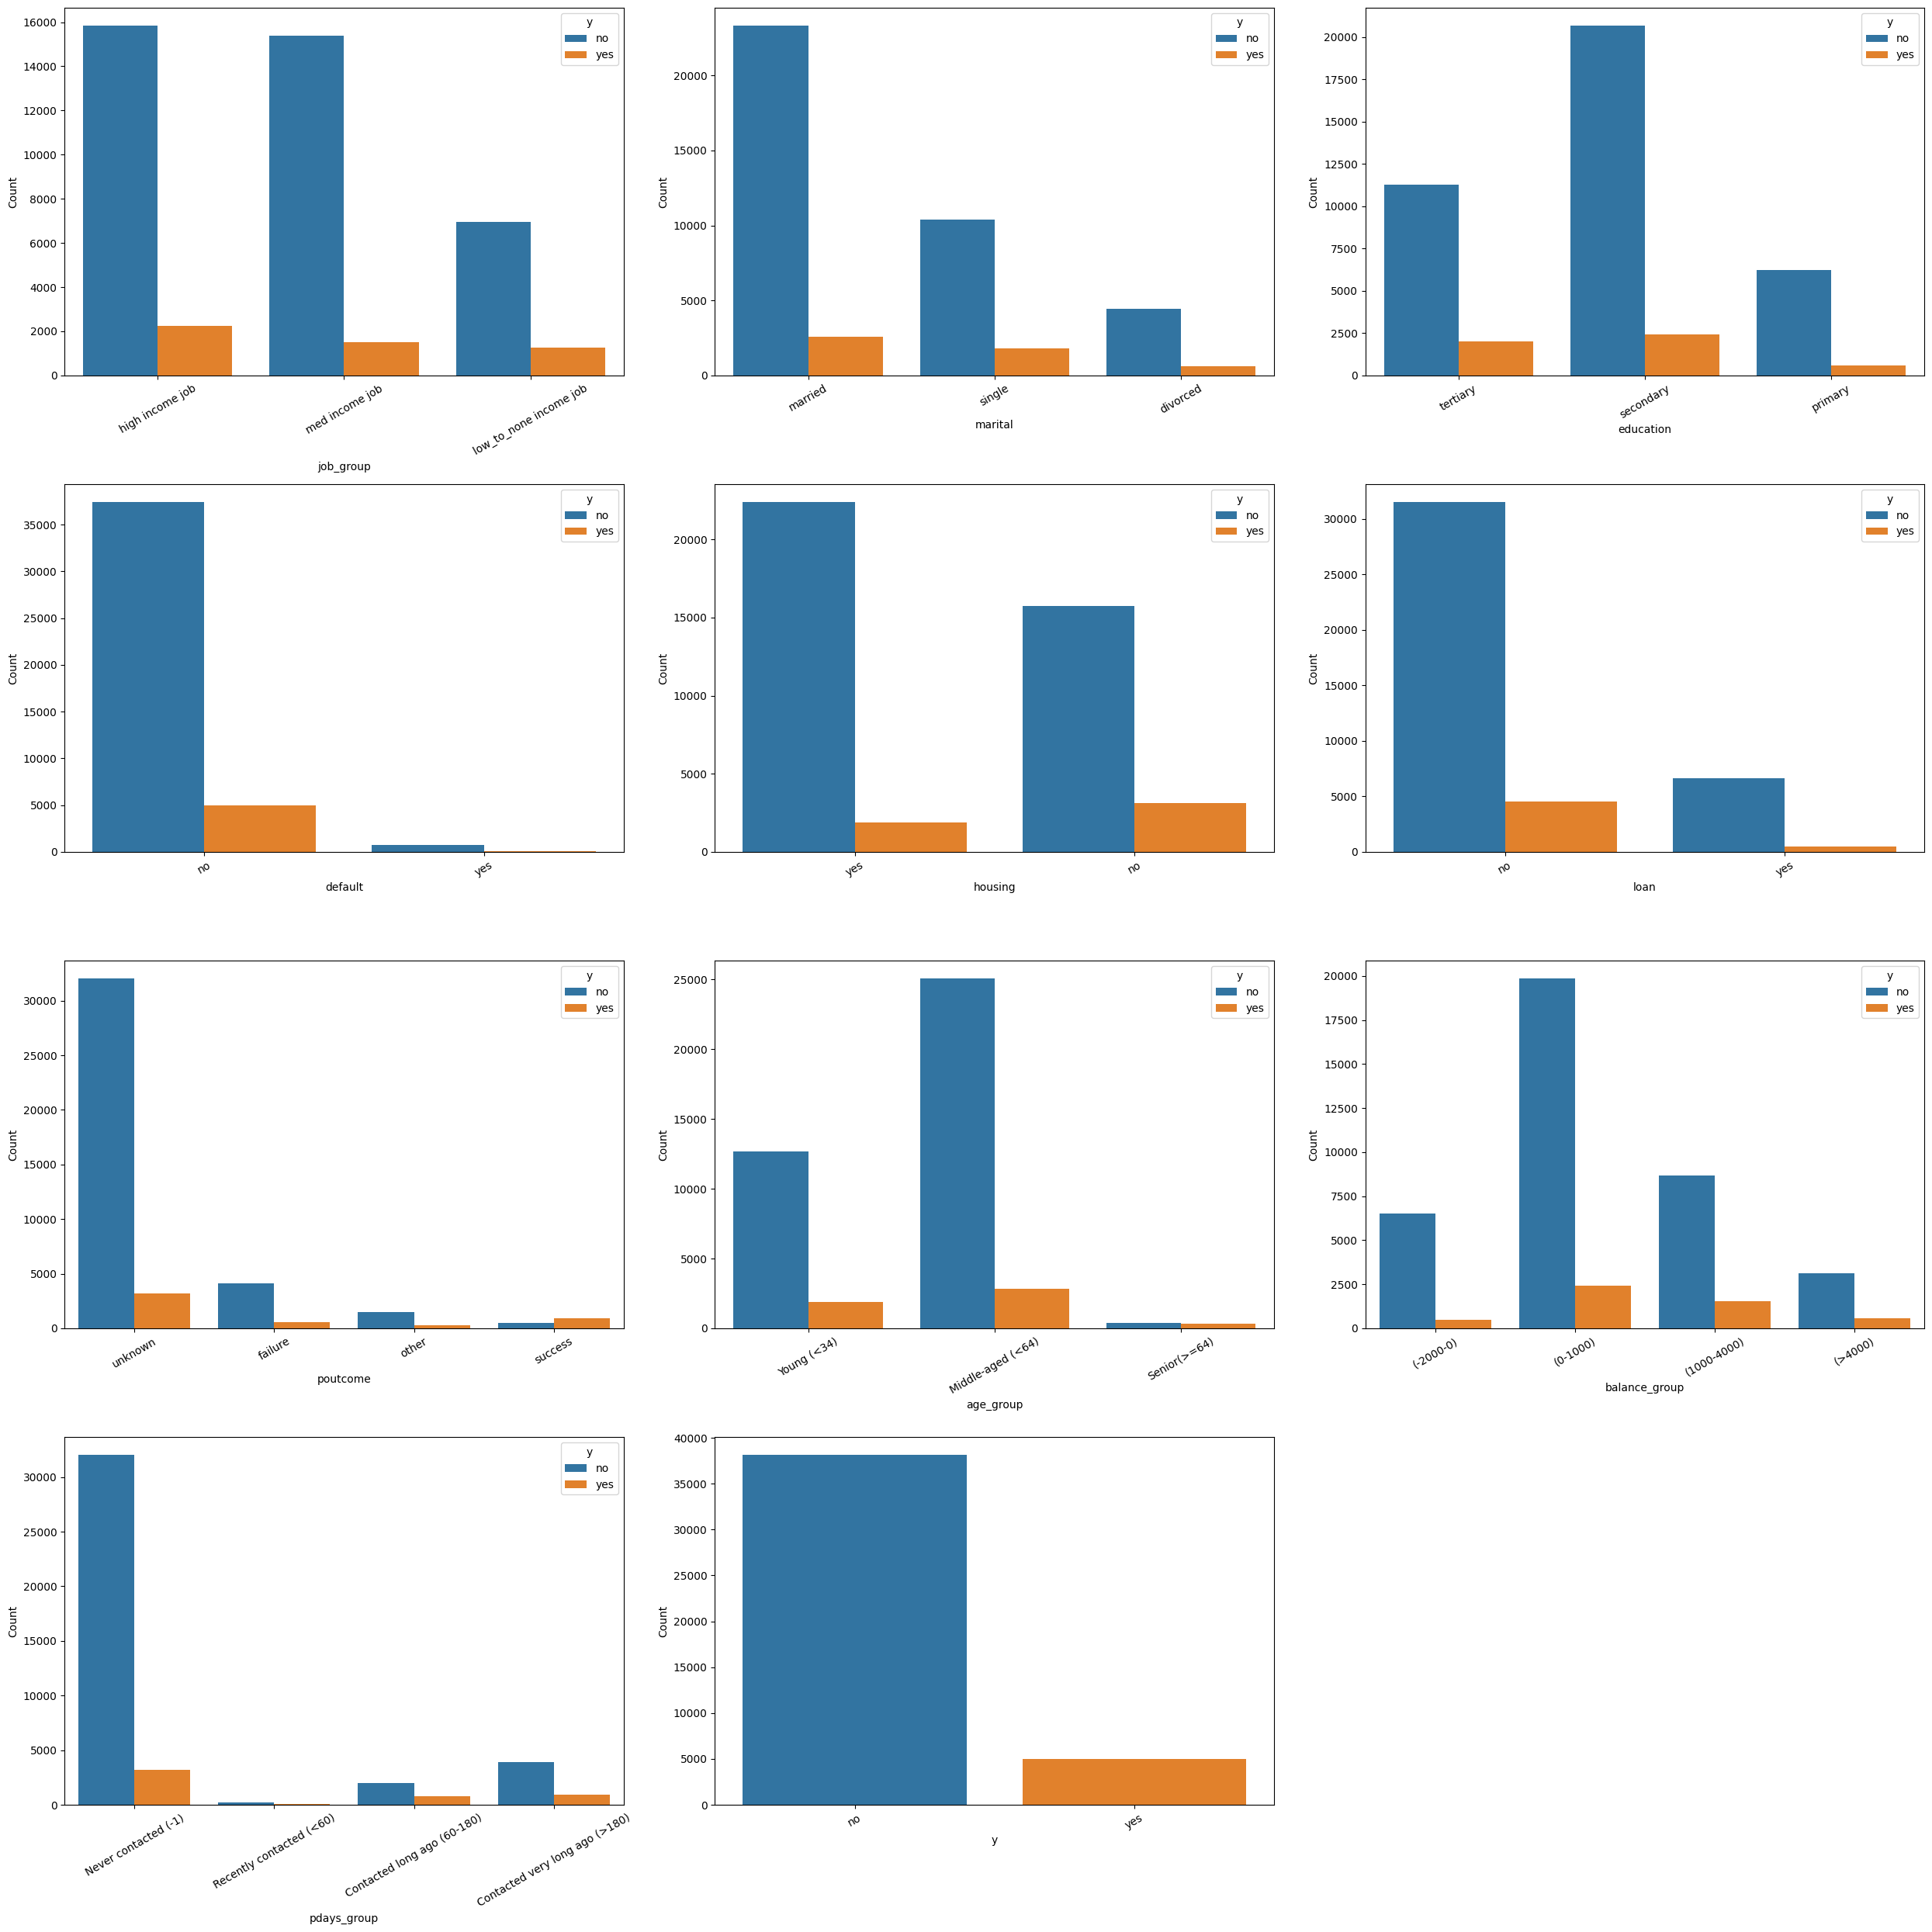

In [68]:
# Set the plot size
plt.figure(figsize=(25, 25))

# Loop through each categorical attribute and create count plots
for i, col in enumerate(categorical_df.columns):
        plt.subplot(4, 3, i+1)  # Adjust the subplot layout as per your number of attributes
        sns.countplot(x=col, data=categorical_df, hue='y')
        plt.xticks(rotation=30)
        plt.xlabel(col)
        plt.ylabel('Count')

plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()

In [69]:
# Compute the ratio of subscription for each category
for col in key_categorical_variables:
        category_counts = categorical_df[col].value_counts()
        category_subscription_counts = categorical_df.loc[df['y'] == 'yes', col].value_counts()
        ratio = category_subscription_counts / category_counts
        print(f"\nSubscription ratio for {col}:")
        print(ratio)


Subscription ratio for job_group:
job_group
high income job           0.124344
med income job            0.089375
low_to_none income job    0.153696
Name: count, dtype: float64

Subscription ratio for marital:
marital
married     0.100324
single      0.148948
divorced    0.118934
Name: count, dtype: float64

Subscription ratio for education:
education
secondary    0.105529
tertiary     0.150204
primary      0.086471
Name: count, dtype: float64

Subscription ratio for default:
default
no     0.117257
yes    0.061381
Name: count, dtype: float64

Subscription ratio for housing:
housing
no     0.166499
yes    0.077145
Name: count, dtype: float64

Subscription ratio for loan:
loan
no     0.126032
yes    0.066554
Name: count, dtype: float64

Subscription ratio for poutcome:
poutcome
failure    0.124655
other      0.165163
success    0.643961
unknown    0.091368
Name: count, dtype: float64

Subscription ratio for age_group:
age_group
Middle-aged (<64)    0.100577
Young (<34)          0.13078

Strong correlation with the target variable y:
1. poutcome (previous outcome): success group has a very high subscription rate (0.64). This indicates that if a customer had a successful outcome before, they are much more likely to subscribe again
2. pdays_group: customers contacted recently or under 180 days show a much higher conversion rate than those never contacted
3. housing: The clients with no hosing loan are more willing to subscribe the product
4. loan: The clients with no personal loans are more willing to subscribe the product
5. age_group: Senior (>64yo) have a very high subscription rate, much higher than other age groups

Moderately correlated variables with the target variable y:
6. balance_group: Higher balance customers are more likely to subscribe, but the effect is quite moderate.
6. marital: single individuals are slightly more likely to subscribe
7. education: higher education level correlate with a higher subscription rate
8. job_group: low-to-none income jobs such as students and retired people are more likely to subscribe compared to other job groups
9. default: customers without a history of default are more likely to subscribe (11.7)

## 3. Finalize the analysis table for prediction process

In [70]:

print(df.isnull().sum())  # Check missing values

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
day_of_week       0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
age_group         0
balance_group     0
duration_group    3
pdays_group       0
previous_group    0
job_group         0
month_num         0
y_num             0
dtype: int64


In [71]:
# Drop all rows with missing values
df = df.dropna()

In [72]:
#copy a new dataframe
df_clean = df.copy()

#drop unnecessary columns
df_clean.drop(columns=['age','job','balance','pdays','duration','campaign','previous','day_of_week', 'month', 'month_num','y_num'], axis=1, inplace=True)
df_clean.head()

,marital,education,default,housing,loan,poutcome,y,age_group,balance_group,duration_group,pdays_group,previous_group,job_group
0,married,tertiary,no,yes,no,unknown,no,Middle-aged (<64),(1000-4000),3-5 mins,Never contacted (-1),No previous contact,high income job
1,single,secondary,no,yes,no,unknown,no,Middle-aged (<64),(0-1000),2-3 mins,Never contacted (-1),No previous contact,high income job
2,married,secondary,no,yes,yes,unknown,no,Young (<34),(0-1000),2min or less,Never contacted (-1),No previous contact,med income job
5,married,tertiary,no,yes,no,unknown,no,Middle-aged (<64),(0-1000),2-3 mins,Never contacted (-1),No previous contact,high income job
6,single,tertiary,no,yes,yes,unknown,no,Young (<34),(0-1000),3-5 mins,Never contacted (-1),No previous contact,high income job


In [73]:
# Loop through columns
for col in df_clean.columns:
# Print the number of unique values
  print(f"Number of unique values in {col} column: ",df_clean[col].unique())

Number of unique values in marital column:  ['married' 'single' 'divorced']
Number of unique values in education column:  ['tertiary' 'secondary' 'primary']
Number of unique values in default column:  ['no' 'yes']
Number of unique values in housing column:  ['yes' 'no']
Number of unique values in loan column:  ['no' 'yes']
Number of unique values in poutcome column:  ['unknown' 'failure' 'other' 'success']
Number of unique values in y column:  ['no' 'yes']
Number of unique values in age_group column:  ['Middle-aged (<64)', 'Young (<34)', 'Senior(>=64)']
Categories (3, object): ['Young (<34)' < 'Middle-aged (<64)' < 'Senior(>=64)']
Number of unique values in balance_group column:  ['(1000-4000)', '(0-1000)', '(-2000-0)', '(>4000)']
Categories (4, object): ['(-2000-0)' < '(0-1000)' < '(1000-4000)' < '(>4000)']
Number of unique values in duration_group column:  ['3-5 mins', '2-3 mins', '2min or less', '5-10 mins', '> 10 mins']
Categories (5, object): ['2min or less' < '2-3 mins' < '3-5 mi

In [74]:
#convert categorical variables to numerical using map function
df_clean['age_group'] = df_clean['age_group'].map({'Young (<34)': 1, 'Middle-aged (<64)': 2, 'Senior(>=64)': 3})
df_clean['marital'] = df_clean['marital'].map({'single': 1, 'married': 2, 'divorced': 3})
df_clean['education'] = df_clean['education'].map({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})
df_clean['job_group'] = df_clean['job_group'].map({'low_to_none income job':1,'med income job':2,'high income job':3})
df_clean['default'] = df_clean['default'].map({'yes': 1, 'no': 0})
df_clean['housing'] = df_clean['housing'].map({'yes': 1, 'no': 0})
df_clean['loan'] = df_clean['loan'].map({'yes': 1, 'no': 0})
df_clean['poutcome'] = df_clean['poutcome'].map({'unknown': 0, 'other': 0, 'failure': 1, 'success': 2})
df_clean['balance_group'] = df_clean['balance_group'].map({'(-2000-0)': 0, '(0-1000)': 1, '(1000-4000)': 2,'(>4000)':3})
df_clean['pdays_group'] = df_clean['pdays_group'].map({'Never contacted (-1)':0, 'Recently contacted (<60)':1, 'Contacted long ago (60-180)':2, 'Contacted very long ago (>180)':3})
df_clean['duration_group'] = df_clean['duration_group'].map({'2min or less':1,'2-3 mins':2, '3-5 mins':3, '5-10 mins':4, '> 10 mins':5})
df_clean['previous_group'] = df_clean['previous_group'].map({'No previous contact': 0, 'Previous contact':1})
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43190 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   marital         43190 non-null  int64   
 1   education       43190 non-null  int64   
 2   default         43190 non-null  int64   
 3   housing         43190 non-null  int64   
 4   loan            43190 non-null  int64   
 5   poutcome        43190 non-null  int64   
 6   y               43190 non-null  int64   
 7   age_group       43190 non-null  category
 8   balance_group   43190 non-null  category
 9   duration_group  43190 non-null  category
 10  pdays_group     43190 non-null  category
 11  previous_group  43190 non-null  int64   
 12  job_group       43190 non-null  int64   
dtypes: category(4), int64(9)
memory usage: 3.5 MB


In [76]:
#convert call categorical columns to integer
df_clean['age_group'] = df_clean['age_group'].astype(int)
df_clean['balance_group'] = df_clean['balance_group'].astype(int)
df_clean['pdays_group'] = df_clean['pdays_group'].astype(int)
df_clean['duration_group'] = df_clean['duration_group'].astype(int)

print

<function print>

In [77]:
df_clean.head()

,marital,education,default,housing,loan,poutcome,y,age_group,balance_group,duration_group,pdays_group,previous_group,job_group
0,2,3,0,1,0,0,0,2,2,3,0,0,3
1,1,2,0,1,0,0,0,2,1,2,0,0,3
2,2,2,0,1,1,0,0,1,1,1,0,0,2
5,2,3,0,1,0,0,0,2,1,2,0,0,3
6,1,3,0,1,1,0,0,1,1,3,0,0,3


# V. Prediction Models

## 1. Splitting dataset into train & test datasets

In the context of the bank project, we split the dataset into training (75%) and testing (25%) to ensure the model learns from a large portion of the data while still having a separate, unseen dataset for evaluation. This is crucial because the goal is to predict whether a customer will subscribe to a financial product based on various factors such as marital status, education, and previous campaign interactions

By keeping 75% of the data for training, the model gets enough examples to generalize patterns, while the 25% test set allows us to measure its real-world performance. This prevents overfitting, the model does not just memorize patterns from the training data but can make accurate predictions on new customers

x contains all independent variables (features), obtained by dropping the target column 'y'.
y contains the dependent variable, which we aim to predict

In [78]:
from sklearn.model_selection import train_test_split
X = df_clean.drop('y', axis=1)
y = df_clean['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

The training set consists of 32,392 samples with 12 features, while the testing set contains 10,798 samples with the same 12 features.

In [79]:
# checking the shape
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (32392, 12) (32392,)
Testing data shape: (10798, 12) (10798,)


## 2. Building the model

To answer the business questions—identifying factors influencing subscriptions, assessing call duration’s impact, and predicting customer behavior—the model must use key features like demographics, financial status, and past interactions. Call duration is a strong predictor, that w ould require correlation analysis

Import the LogisticRegression class from sklearn.linear_model, which is used to perform logistic regression

In [80]:
from sklearn.linear_model import LogisticRegression

This object (logreg) will later be trained using the dataset.

In [81]:
# Initialize logistic regression model
logreg = linear_model.LogisticRegression()

1. Creates another instance of LogisticRegression().
2. Trains the model using the training data (X_train and y_train)
3. The .fit() method allows the model to learn the relationship between input features (X_train) and the target variable (y_train)

In [82]:
# Fit logistic regression with best features
logreg= LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

This code extracts and displays the coefficients and intercept of the trained logistic regression model to interpret the impact of each feature on predictions. The loop prints each feature alongside its coefficient, making it easier to understand their influence compared to directly printing the array. 

The intercept, also printed, represents the baseline log-odds when all features are zero

This approach enhances model interpretability, allowing for better business insights into which factors most affect customer subscription likelihood.

In [83]:
coef = logreg.coef_ # assigns the variable name coef to the coefficients of the model

for p,c in zip(X_train, list(coef[0])):
    print(p + '\t' + str(c)) # this is just a better way to visualize the data, where a for loop is used to line up each coefficient with their value
    
#print(coef) # simply printing the coefficients is not as easy to read - be sure to try it
    
intercept = logreg.intercept_ # assigns the variable name intercept to the intercept of the model

print(intercept) # visualizes the intercept

marital	-0.15490185013504654
education	0.35018768256940913
default	-0.183760182459889
housing	-0.9740302949994432
loan	-0.5221876877670868
poutcome	1.3042783856548286
age_group	-0.0632269518404015
balance_group	0.181814377934054
duration_group	1.0540097555107173
pdays_group	-0.2041186819901554
previous_group	0.4026982118812226
job_group	-0.1472083656747661
[-5.46061831]


The model:

The logistic regression model predicts the probability of a customer subscribing to a term deposit based on various features. The equation represents the log-odds of a positive response, which is later transformed into a probability using the sigmoid function. Each coefficient in the equation shows how much the log-odds change with a one-unit increase in the respective feature. A positive coefficient means the feature increases the likelihood of subscription, while a negative coefficient means it decreases the likelihood.

For example, in the equation:

y=(−5.279)+(−0.18)*marital+0.37*education+(-0.24)*default+(-0.95)*housing+(-0.55)*loan+1.23*poutcom+0.003*age_group+0.175*balance_group+1.04*duration_group+(-0.26)*pdays_group+0.62*previous_group+(-0.16)*job_group

- The intercept (-5.279) represents the baseline log-odds when all feature values are 0
- The marital coefficient (-0.18) means that being married slightly reduces the likelihood of subscribing
- Other features like education, balance, and previous campaign responses will have their respective coefficients influencing the prediction

The equation models the log-odds of subscription probability for the bank to estimate the likelihood of a positive response and tailor its approach accordingly.

## 3. Testing the model

The logistic regression model (logreg) makes predictions on the test dataset (X_test). The predicted values (y_pred) represent the model’s classification of whether a customer will subscribe to the bank’s offer.

In [88]:
y_pred = logreg.predict(X_test)

Confusion matrix is a performance evaluation metric for classification models. The confusion_matrix(y_test, y_pred) function compares the actual labels (y_test) with the predicted labels (y_pred) to assess model performance.

In [89]:
# import the metrics class
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9324,  204],
       [ 958,  312]])

(TN) = 9352 → Customers correctly classified as not subscribing
(FP) = 215 → Customers incorrectly classified as subscribing when they didn't
(FN) = 906 → Customers incorrectly classified as not subscribing when they actually did
(TP) = 325 → Customers correctly classified as subscribing


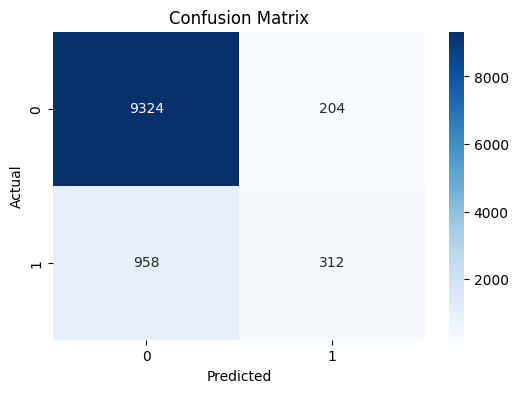

In [90]:
# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

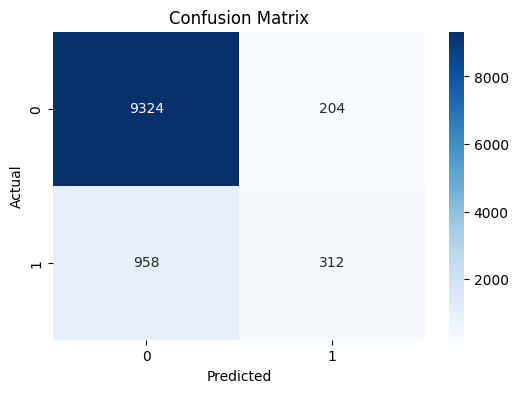

In [91]:
# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This classification report evaluates the performance of the logistic regression model in predicting customer subscription. The model achieves 90% accuracy, meaning it correctly classifies most cases. However, it performs significantly better for the "No Subscription" class (precision: 0.91, recall: 0.98) compared to the "Yes Subscription" class (precision: 0.60, recall: 0.26). The low recall for "Yes Subscription" suggests the model struggles to identify actual subscribers, likely due to class imbalance. While precision for "Yes Subscription" is moderate at 0.60, the F1-score of 0.37 highlights the poor balance between precision and recall

In [92]:
# Generate classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

target_names = ['No Subscription' , 'Yes Subscription']
report = classification_report(y_test, y_pred, target_names = target_names)
print(report)

                  precision    recall  f1-score   support

 No Subscription       0.91      0.98      0.94      9528
Yes Subscription       0.60      0.25      0.35      1270

        accuracy                           0.89     10798
       macro avg       0.76      0.61      0.65     10798
    weighted avg       0.87      0.89      0.87     10798



## 3. Choosing the best features for the new model

By ranking these coefficients, we can determine which variables contribute most to the model's predictions.

In [95]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 104.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [97]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

Using Sequential Feature Selector (SFS) is crucial for answering the business questions because it helps identify the most important variables influencing customer subscription. By selecting the best 7 features based on ROC-AUC score, the model focuses on the most predictive factors, improving both interpretability and efficiency. This directly answers our first question: "What factors influence whether a customer subscribes?", as the most important features are retained while irrelevant ones are removed.

In [99]:
sfs1 = sfs(logreg, 
          k_features=7, 
          forward=True, 
          verbose = 2,
          scoring='roc_auc')

Additionally, this process helps in optimizing the model’s performance by ensuring that only the most relevant features are used, reducing overfitting and improving generalization to new data. Since call duration is a known strong predictor, this method ensures we quantify its impact while also identifying other influential variables, addressing the second business question

Lastly, by refining the model with only the strongest predictors, it enhances the accuracy of predicting whether a customer will subscribe, making the model more actionable for the bank’s marketing strategy

In [101]:
sfs2 = sfs1.fit(X_test, y_test)


[2025-03-16 23:48:53] Features: 1/7 -- score: 0.7926711819845466
[2025-03-16 23:49:00] Features: 2/7 -- score: 0.8242779964118865
[2025-03-16 23:49:11] Features: 3/7 -- score: 0.8432390949881585
[2025-03-16 23:49:21] Features: 4/7 -- score: 0.8502849769882822
[2025-03-16 23:49:32] Features: 5/7 -- score: 0.8526185569125249
[2025-03-16 23:49:42] Features: 6/7 -- score: 0.8545514706314478
[2025-03-16 23:49:53] Features: 7/7 -- score: 0.8551634593475553

The selected features—education, housing, loan, poutcome, age_group, balance_group, and duration_group—were chosen based on their contribution to the ROC-AUC score, ensuring the model focuses on the most relevant variables. This directly improves interpretability and efficiency by removing noise from the dataset

In [102]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['education', 'housing', 'loan', 'poutcome', 'balance_group', 'duration_group', 'job_group']


By creating new datasets (X_train_2 and X_test_2) containing only these selected features, the model is retrained to optimize prediction performance. This step enhances accuracy and generalization, addressing the business questions more effectively by focusing on key factors influencing customer subscription while minimizing unnecessary complexity

In [103]:
# Create new DataFrames X_train_2 and X_test_2 with only the best features
X_train_2 = X_train[feat_names].copy()
X_test_2 = X_test[feat_names].copy()

In [104]:
# Fit logistic regression with best features
logreg_2 = LogisticRegression()
logreg_2.fit(X_train_2, y_train)

LogisticRegression()

This refined logistic regression model, trained with only the best-selected features, improves interpretability and efficiency while maintaining strong predictive power.By displaying the intercept (-5.89) and coefficients for each feature, we can quantify how each variable impacts the log-odds of customer subscription. 

 For example, duration_group (0.31) positively influences the likelihood of subscription, whereas housing (-1.0) and loan (-0.57) negatively affect it. This confirms that longer call durations increase the probability of subscription, aligning with business expectations.

In [113]:
# Print intercept and coefficients
print("Intercept:", round(logreg_2.intercept_[0], 2))
print("Coefficients:", [round(coef, 2) for coef in logreg_2.coef_[0]])

Intercept: -5.92
Coefficients: [0.38, -0.98, -0.54, 1.24, 0.18, 1.05, -0.14]


In [105]:
Feature_table = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
Feature_table.to_csv('Feature_table.csv', index=False)
print(Feature_table)

              feature_idx                                          cv_scores  \
1                    (8,)  [0.8038126595665573, 0.7833313365997141, 0.786...   
2                  (5, 8)  [0.8216335071180112, 0.8174703175219571, 0.813...   
3               (3, 5, 8)  [0.8313035503300809, 0.8424122745412332, 0.834...   
4            (3, 5, 7, 8)  [0.8429782452429543, 0.8429007857491057, 0.841...   
5         (3, 4, 5, 7, 8)  [0.8456789995951451, 0.8460074278490635, 0.842...   
6      (1, 3, 4, 5, 7, 8)  [0.8471352380795003, 0.8476113557683569, 0.842...   
7  (1, 3, 4, 5, 7, 8, 11)  [0.8476970776082161, 0.8498153365666647, 0.841...   

  avg_score                                      feature_names  ci_bound  \
1  0.792671                                  (duration_group,)  0.009451   
2  0.824278                         (poutcome, duration_group)  0.010986   
3  0.843239                (housing, poutcome, duration_group)  0.012471   
4  0.850285  (housing, poutcome, balance_group, duratio

The new model with best features

y = (-5.92)+0.38*duration_grup+ (-0.98)*poutcome+(-0.54)*housing+ 1.24*balance_group+0.18*loan+ 1.05*education+(-0.14)*marital

## 4. Test the new model

This classification report evaluates the new logistic regression model with selected features, showing an overall accuracy of 90%, similar to the previous model. However, while the precision for "Yes Subscription" (0.59) is decent, its recall remains low at 0.26, meaning the model struggles to correctly identify actual subscribers. This suggests that although reducing features helped simplify the model, it may have lost some important predictive power for the minority class.

In [106]:
y_pred_2 = logreg_2.predict(X_test_2)

The model still performs well in predicting "No Subscription", with high precision (0.91) and recall (0.98), which dominates the classification results. The macro average recall (0.62) and F1-score (0.65) indicate some imbalance in performance across both classes. 

In [107]:
target_names = ['No Subscription' , 'Yes Subscription']
report = classification_report(y_test, y_pred_2, target_names = target_names)
print(report)

                  precision    recall  f1-score   support

 No Subscription       0.91      0.98      0.94      9528
Yes Subscription       0.60      0.25      0.35      1270

        accuracy                           0.89     10798
       macro avg       0.75      0.61      0.65     10798
    weighted avg       0.87      0.89      0.87     10798



Recommendation: Address model bias towards non-subscribers

- The model performs well in identifying non-subscribers (high precision & recall) but struggles with predicting actual subscribers

- Implement data balancing approaches to enhance recall for potential customers

# VI. Conclusion and Recommendations 

### Key drivers for subscription: 

Call Duration (duration): One of the strongest predictors of subscription (cor. = 0.4). Clients with longer calls are significantly more likely to subscribe. This implies that maintaining engaging conversations may positively influence outcomes.                                                                                           
Days Since Last Contact (pdays): Highly correlated with subscription (cor. = 0.45). Clients contacted after a long gap are more likely to subscribe.

### Demographic and Behavioral Insights

Repeat Contact: Higher average of subscribers are amongst previous contacts. Previous conversations had a strong influence of a success and the conversion rate of 64%.
Account Balance: Subscribers tend to have higher balances.
Loan & Housing: Clients without personal or housing loans show higher subscription rates.
Job & Education: Retired individuals, students, and highly educated clients subscribe more frequently.
Marital Status: Single clients are slightly more likely to subscribe.
Default: History of default is negatively associated with subscriptions.

### Recommendations: 

Contact strategy: 
Prioritize re-contacting clients with prior interactions and longer gaps since last contact.

Target profiles:
Target customer profiles with high conversion potential. Target clients have the following attributes: long call duration, higher number of past interactions, higher balance, no loans, no history of default and higher education.

Call strategies: 
1. Develop separate strategies for first-time contacts vs. returning clients.                                                                                                             2.Create a separate strategy for segment communication: seniors may need a tailored message due to higher conversion rate and single clients respond differently than married client due to marital status.                                                                                                                                                             3. Longer gaps between contact may improve success (based off of pdays).                                                                                                                  4. Limit active campaign contacts to avoid possible client fatigue due to overwhelming marketing.

# VII. Executive Summary

## 1. Customer Business and Target Values

### Defining customer business and objective:

The data represents a marketing campaign conducted by a Portuguese banking institution.  
The campaign is based on phone calls with clients. In some cases, multiple contacts with the same client were required to determine whether the client would subscribe to a bank term deposit (with the outcome being either 'yes' or 'no').

The objective is to predict whether a client will subscribe to a term deposit (variable y) and to identify the attributes that have the greatest impact on clients likely to subscribe.

### Target questions:

1. What factors influence whether a customer subscribes (y)?
2. Predicting the characteristics that determine if a customer will subscribe or not to a term deposit.
3. How to adjust customer communication to increase the likelihood of customer subscription?                            

## 2. Data Dictionary 

### Dataset overview:

The dataset consists of 45,211 observations and 17 columns (descriptions) that relate to a bank marketing campaign. Overall, the dataset contains both, numerical and categorical values that capture demographic information, financial status, contact- related information and past campaign outcomes.

Target Variable is (y). This is a binary target variable that indicates whether a client subscribed to a term deposit. Value "yes' is '1', "no" is '0'.

### Features selected based on relationship with target variable:

Numerical Features Used in the Model 
age: Age of the client.  
balance: Average yearly balance in the client’s account. 
duration: Last contact duration in seconds.
campaign: Number of contacts performed during this campaign. 
pdays: Days since the client was last contacted from a previous campaign. 
previous: Number of contacts before this campaign.

Categorical Features Used in the Model 
job: Type of job                                                                                                                                                                                                                            marital: Marital status.
education: Education level. 
default: Whether the client has credit in default.
housing: Whether the client has a housing loan. 
loan: Whether the client has a personal loan.
contact: Communication type.
month: Last contact month.

## 3. Data Cleaning and Manipulation

### Handling missing data:

In [75]:
# Identified missing values in ‘job’ (288), ‘education’ (1,857), ‘poutcome’ (36,959), and ‘contact’ (13,020).
# df.isnull().sum() 

In [77]:
# Dropped ‘contact’ due to excessive missing values (~30% of dataset).
# df.drop(columns=["contact"], inplace=True)

In [3]:
# Dropped rows with missing values in ‘job’ and ‘education’ (since they were <5% (~ 2260 records)of total data).
# cols_to_drop = df.columns[df.isna().sum() <= len(df) * 0.05]
# df.dropna(subset=cols_to_drop, inplace=True) 

In [4]:
# Imputed ‘poutcome’ missing values with "unknown" since it retains important customer history.
# df["poutcome"].fillna("unknown", inplace=True)

### Handling Outliers and Data Transformation:

#### Key Issues Identified

In [18]:
# summarize numerical variables by create histograms
# for i, col in enumerate(numeric_df.columns):
#    sns.histplot(df[col], bins=30, kde=True)

<img src="outlier.png" width="" align="" />

- balance: Highly skewed (max = 102,127 EUR).c g            cccc

- duration: There were calls up to more than 1 hours, while most of calls was under 10 mins

- pdays: Most values were -1 (never contacted before).

- previous: Most values were 0, and some had up to 275 previous interactions, which was excessive.

#### Solutions to reduce skewness

Binning numerical values reduces skewness and highlights behavioral trends affecting subscription likelihood.

In [6]:
# Binned ‘balance’ into four groups
# df["balance_group"] = pd.cut(df["balance"], 
#                             bins=[-2000, 0, 1000, 4000, df["balance"].max()], 
#                             labels=["(-2000-0)", "(0-1000)", "(1000-4000)", "(>4000)"])

In [7]:
# Binned ‘duration’ into categories
# df["duration_group"] = pd.cut(df["duration"], 
#                              bins=[0, 120, 180, 300, 600, df["duration"].max()], 
#                              labels=["2min or less", "2-3 mins", "3-5 mins", "5-10 mins", "> 10 mins"])

In [8]:
# Converted ‘pdays’ into categorical bins
# df["pdays_group"] = pd.cut(df["pdays"], 
#                           bins=[-2, 0, 60, 180, df["pdays"].max()], 
#                           labels=["Never contacted (-1)", "Recently contacted (<60)", 
#                                   "Contacted long ago (60-180)", "Contacted very long ago (>180)"])

In [9]:
# Converted previous into categorical bins
# df["previous_group"] = np.where(df["previous"] == 0, "No previous contact", "Previous contact")

### Encoding Categorical Variables

#### Grouped ‘job’ into three categories:

- High income (management, self-employed, technician)

- Medium income (admin, blue-collar, entrepreneur)

- Low to none income (students, retired, unemployed, housemaid)

In [10]:
# df["job_group"] = np.where(df['job'].isin(['management', 'self-employed', 'technician']), 'high income job', 
#                        np.where(df['job'].isin(['admin.', 'blue-collar', 'entrepreneur', 'housemaid']), 'med income job',
#                        'low_to_none income job'))

#### Encoded ‘poutcome’:

- Unknown/Other → 0, Failure → 1, Success → 2

In [11]:
# df["poutcome"] = df["poutcome"].map({"unknown": 0, "failure": 1, "other": 0, "success": 2})

## 4. Exploratory Data Analysis (EDA)

### Key steps taken:

- Identified relationships between numerical variables and the target variable by using heatmap and calculating the correlation numbers

In [12]:
# sns.heatmap(numberic_df.corr(), annot = True)
# correlation_matrix = numeric_df.corr()

- Identified relationships between categorical variables and the target variable by using plotting and computing the ratio of subscription for each category

In [13]:
# sns.countplot(x=col, data=categorical_df, hue='y')

# Compute the ratio of subscription for each category
# category_counts = categorical_df[col].value_counts()
# category_subscription_counts = categorical_df.loc[df['y'] == 'yes', col].value_counts()
# ratio = category_subscription_counts / category_counts

- Decided key factors that were more likely correlated with target variable

- Finalized data ready for modeling

### Correlation Analysis Findings

- duration had the strongest correlation with subscription especially call > 5mins. Short calls (<2mins) rarely led to subscriptions

- Customers previouslycontacted were twice as likely to subscribe compared to those never contacted before

- Customers with successful past outcomes (poutcome = success) had a 64% conversion rate.

- pdays: Customers contacted recently (<60 days) had higher conversion rates than those contacted a long time ago (>180 days).

- Higher balance customers were more likely to subscribe, but impact was moderate.

- Customers without housing loans or personal loans were more likely to subscribe.

- job and age: seniors and high-income professionals had higher conversions

- education and marital variables didn't appear with clear pattern, but we still keep them for modeling

- There is no patterns I could see in month and day_of_week variables

### Finalize data ready for modeling

- The Final dataset contained 13 features:  job group, education, marital status, housing, loan, poutcome, age group, balance group, call duration, previous contacts

- Converted all categorical bins and values to numbers

In [14]:
#convert categorical variables to numerical using map function
# df_clean['age_group'] = df_clean['age_group'].map({'Young (<34)': 1, 'Middle-aged (<64)': 2, 'Senior(>=64)': 3})
# df_clean['marital'] = df_clean['marital'].map({'single': 1, 'married': 2, 'divorced': 3})
# df_clean['education'] = df_clean['education'].map({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3})
# df_clean['job_group'] = df_clean['job_group'].map({'low_to_none income job':1,'med income job':2,'high income job':3})
#df_clean['default'] = df_clean['default'].map({'yes': 1, 'no': 0})
# df_clean['housing'] = df_clean['housing'].map({'yes': 1, 'no': 0})
# df_clean['loan'] = df_clean['loan'].map({'yes': 1, 'no': 0})
# df_clean['poutcome'] = df_clean['poutcome'].map({'unknown': 0, 'other': 0, 'failure': 1, 'success': 2})
# df_clean['balance_group'] = df_clean['balance_group'].map({'(-2000-0)': 0, '(0-1000)': 1, '(1000-4000)': 2,'(>4000)':3})
# df_clean['pdays_group'] = df_clean['pdays_group'].map({'Never contacted (-1)':0, 'Recently contacted (<60)':1, 'Contacted long ago (60-180)':2, 'Contacted very long ago (>180)':3})
# df_clean['duration_group'] = df_clean['duration_group'].map({'2min or less':1,'2-3 mins':2, '3-5 mins':3, '5-10 mins':4, '> 10 mins':5})
# df_clean['previous_group'] = df_clean['previous_group'].map({'No previous contact': 0, 'Previous contact':1})
# df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

In [15]:
# df_clean = df_clean.astype(int)

## 5. Predictive model

### Data split summary

To build a reliable predictive model for customer subscription, the dataset was split into training (75%) and testing (25%) sets. 

The goal was to predict whether a customer will subscribe to a financial product based on features like marital status, education, and past campaign interactions.

In [22]:
''' 
from sklearn.model_selection import train_test_split
X = df_clean.drop('y', axis=1)
y = df_clean['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
'''

" \nfrom sklearn.model_selection import train_test_split\nX = df_clean.drop('y', axis=1)\ny = df_clean['y']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)\n"

The training set consisted of 32,392 samples with 12 features, while the testing set contained 10,798 samples with the same 12 features.

### Model building & testing

To answer key business questions, a logistic regression model was used to analyze factors influencing customer subscription, including demographics, financial status, and call duration. The model was trained using the training dataset (X_train, y_train), allowing it to learn patterns and relationships between input features and the target variable. The .fit() method used to train the model was then ready to make predictions on new data

In [24]:
'''
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression()

# Train the model using the training dataset
logreg.fit(X_train, y_train)
'''

'\n# Import logistic regression from sklearn\nfrom sklearn.linear_model import LogisticRegression\n\n# Initialize logistic regression model\nlogreg = LogisticRegression()\n\n# Train the model using the training dataset\nlogreg.fit(X_train, y_train)\n'

To build a predictive model for customer subscription, we selected key features that influence a customer’s decision

- Features such as marital status, education, default history, housing loan, personal loan, previous campaign outcomes, balance, and call duration were analyzed to determine their impact. Each feature’s coefficient was extracted using logistic regression to interpret how it affects the log-odds of subscription.

- With these selected features, we trained a logistic regression model using the training dataset (X_train, y_train)

### Testing the model

In [26]:
'''
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
'''

"\n# Plot the confusion matrix\nplt.figure(figsize=(6,4))\nsns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\nplt.title('Confusion Matrix')\nplt.show()\n"

Precision analysis shows that when the model predicts "No Subscription," it is 91% correct, whereas for "Yes Subscription," it is only 60% correct, meaning that some non-subscribers are mistakenly classified as subscribers

- In terms of recall, the model correctly identifies 98% of actual non-subscribers, that is strong performance in rejecting false positives. However, it only captures 26% of actual subscribers, missing a large proportion of potential customers. 

- The F1-score for "Yes Subscription" is 0.37, which is quite low, indicating the model’s inefficiency in recognizing potential subscribers, whereas the weighted average F1-score of 0.88 suggests a bias toward predicting "No Subscription"

Since the dataset contains significantly more "No Subscription" cases, the model is biased. Solutions include:

-Oversampling to generate more synthetic "Yes Subscription" cases 
- Undersampling to balance the dataset
-Adjusting decision threshold to increase sensitivity to "Yes Subscription" cases

### Summary

Call duration emerged as a strong predictor, confirming that longer conversations increase the likelihood of a positive response. Conversely, financial commitments such as housing and personal loans negatively impacted subscription probability, suggesting that customers with existing financial obligations are less likely to subscribe. These insights highlight the importance of focusing on customer engagement strategies and refining target audiences for marketing efforts

- The model achieved 90% accuracy, primarily driven by correctly identifying non-subscribers

- However, it exhibited low recall for actual subscribers (26%), indicating difficulty in detecting customers who would subscribe. The confusion matrix revealed a high false negative rate, meaning many potential subscribers were misclassified as non-subscribers

- This imbalance suggests that while the model is effective in ruling out non-subscribers, it lacks the sensitivity to capture actual conversions, which could hinder business decision-making and marketing effectiveness.

## 6. Recommendations 

### Factors that influence whether customer subscribes:

Two strongest predictors that indicate that a customer will most likely subscribe is call duration and days since last contact.

### Predicting characteristics that impact the likelihood of subscription:

Focus on Target Profiles: 
Target clients have the following attributes: long call duration, higher number of past interactions, higher balance, no loans, no history of default and higher education. These attributes have a higher chance of a customer subscribing. 

### Adjusting customer communication to increase the chances of customer subscription:

Change Call strategies: 
1. Develop separate strategies for first-time contacts vs. returning clients. 
2.Create a separate strategy for segment communication: seniors may need a tailored message due to higher conversion rate and single clients respond differently than married client due to marital status. 
3. Longer gaps between contact may improve success (based off pdays). 
4. Limit active campaign contacts to avoid possible client fatigue due to overwhelming marketing.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7fa8bb69-c49c-46a7-98b0-1210046c53dc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>